# 🧪 Pre‑Parcial – Métodos Predictivos
**Supervisado vs. No Supervisado**

> Completa las celdas con `TODO` y ejecuta *Runtime → Run all* antes de entregar.


### Contenido
1. [Parte A – Teoría](#parte-a)
2. [Parte B – Práctica](#parte-b)


## <a id='parte-a'></a>📝 Parte A — Cuestionario Teórico (40 pts)
Responde **brevemente** en las celdas Markdown que siguen a cada pregunta.


#### 1️⃣ **Variable objetivo (y)** – Defínela y da un ejemplo en este dataset.

*Respuesta:* <!-- TODO -->

**En un modelo predictivo, la variable objetivo ('y') es lo que se intenta pronosticar. En un modelo para predecir el rendimiento de los estudiantes, la variable objetivo aquí podría ser la nota final de un estudiante en un curso.**


#### 2️⃣ Ordena las fases del *pipeline* de ML: `Modelado`, `Pre‑procesamiento`, `EDA`, `Evaluación`, `Insight de negocio`.

*Respuesta:* <!-- TODO -->
**EDA**

**Pre-procesamiento**

**Modelado**

**Evaluación**

**Insight de negocio**

**Despues decomprender el problema de negocio, se exploraran los datos, prepararlos, construir el modelo predictivo, evaluar su rendimiento y, finalmente, tomar decisiones informadas basadas en sus resultados.**

#### 3️⃣ Para un problema de **clases desbalanceadas**, ¿qué métrica priorizarías y por qué?

*Respuesta:* <!-- TODO -->
**el F1-score. Esta métrica es ideal porque considera tanto la precisión como el recall, lo que resulta crucial cuando las categorías de lo que intentas predecir no están balanceadas**

#### 4️⃣ Describe **overfitting** y cómo lo detectarías en la práctica.

*Respuesta:* <!-- TODO -->
**El overfitting ocurre cuando un modelo de Machine Learning memoriza no solo las tendencias importantes de los datos de entrenamiento, sino también los detalles insignificantes y el "ruido". Esto lo hace excelente para predecir en los datos que ya ha visto, pero muy pobre para hacer predicciones precisas sobre datos nuevos y desconocidos.**

#### 5️⃣ Completa: *K‑means es un algoritmo de _________ porque ________.*

*Respuesta:* <!-- TODO -->
**K-means es un algoritmo de agrupación que no necesita que los datos estén previamente etiquetados porque organiza automáticamente los puntos de datos en 'k' grupos, basándose en lo similares que son entre sí.**

#### 7️⃣ En **regresión**, ¿cómo es la variable objetivo? (cualitativa, cuantitativa, binaria…).

*Respuesta:* <!-- TODO -->
**En regresión, la variable objetivo es siempre de naturaleza cuantitativa. Esto significa que lo que buscamos predecir es un valor numérico que puede tomar cualquier cifra dentro de un rango, como la edad precisa de una persona.**

#### 8️⃣ Menciona 2 técnicas comunes de **pre‑procesamiento de texto**.

*Respuesta:* <!-- TODO -->
**Stemming: Corta los sufijos de las palabras para llegar a una raíz común, que no siempre es una palabra real. Por ejemplo, "corriendo" y "correr" podrían reducirse a "corr".**

**Normalizacion: implica transformar el texto para que siga un formato uniforme. Esto podría ser, por ejemplo, convertir todas las letras a minúsculas o eliminar la puntuación**

#### 9️⃣ ¿Qué representa el parámetro *k* en K‑means y qué ocurre si es muy grande?

*Respuesta:* <!-- TODO -->
**La K en K-means define la cantidad de grupos que el algoritmo intentará crear. Si se tiene una 'K' excesivamente grande, los grupos resultantes pueden ser demasiado pequeños o fragmentados. Esto significa que, en lugar de identificar patrones significativos, el modelo podría estar capturando ruido o divisiones sin importancia, lo que dificultaría tanto la comprensión de los resultados como la aplicación del modelo a nuevos datos.**

#### 🔟 Define brevemente un **embedding** en NLP y su utilidad.

*Respuesta:* <!-- TODO -->
**Un embedding en PLN es una representación numérica compacta de palabras donde palabras con significados parecidos están "cerca" entre sí. Su utilidad radica en permitir que los modelos de Machine Learning comprendan el significado y el contexto del lenguaje, mejorando drásticamente su capacidad para procesar y entender el text**

## <a id='parte-b'></a>💻 Parte B — Práctica (60 pts)
Trabajarás con la tabla de reseñas de Amazon que contiene, entre otras, las columnas `reviewerID`, `asin`, `helpful`, `reviewText`, `overall`, `summary`, `unixReviewTime`, `day_diff`.

> **Objetivos**
> 1. Clasificar reseñas positivas (rating ≥ 4) vs negativas.
> 2. Agrupar reseñas con K‑means y perfilar clusters.


Columnas de la tabla
📄 Reviewer ID: Unique identifier for the reviewer.

📦 ASIN: Amazon Standard Identification Number for the product.

👤 Reviewer Name: Name of the reviewer.

👍 Helpful: Number of helpful votes the review received.

📝 Review Text: The content of the review written by the customer.

⭐ Overall Rating: The overall rating given to the product (ranging from 1 to 5 stars).

📰 Summary: A brief summary of the review.

🕰️ Unix Review Time: The time the review was posted in Unix timestamp format.

📅 Review Time: The time the review was posted in a readable date format.

📆 Day Difference: The number of days between the review date and the current date.

✔️ Helpful Yes: Number of positive helpful votes.

🔢 Total Votes: Total number of votes the review received.

### 1. Setup

In [31]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings, random, os
warnings.filterwarnings('ignore')
random.seed(42)
np.random.seed(42)

### 2. Carga del dataset

In [32]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon_review.csv.zip

--2025-06-03 04:26:23--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon_review.csv.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon_review.csv.zip [following]
--2025-06-03 04:26:23--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon_review.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 721801 (705K) [application/zip]
Saving to: ‘amazon_review.csv.zip.1’

amazon_review.csv.z 100%[===================>] 704

In [33]:
!unzip amazon_review.csv.zip

Archive:  amazon_review.csv.zip
replace amazon_review.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [34]:
import pandas as pd
df = pd.read_csv('amazon_review.csv')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0


### 3. Exploratory Data Analysis (EDA)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      4915 non-null   object 
 1   asin            4915 non-null   object 
 2   reviewerName    4914 non-null   object 
 3   helpful         4915 non-null   object 
 4   reviewText      4914 non-null   object 
 5   overall         4915 non-null   float64
 6   summary         4915 non-null   object 
 7   unixReviewTime  4915 non-null   int64  
 8   reviewTime      4915 non-null   object 
 9   day_diff        4915 non-null   int64  
 10  helpful_yes     4915 non-null   int64  
 11  total_vote      4915 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 460.9+ KB


In [6]:
df.describe()

,overall,unixReviewTime,day_diff,helpful_yes,total_vote
count,4915.000000,4.915000e+03,4915.000000,4915.000000,4915.000000
mean,4.587589,1.379465e+09,437.367040,1.311089,1.521465
std,0.996845,1.581857e+07,209.439871,41.619161,44.123095
min,1.000000,1.339200e+09,1.000000,0.000000,0.000000
25%,5.000000,1.365898e+09,281.000000,0.000000,0.000000
50%,5.000000,1.381277e+09,431.000000,0.000000,0.000000
75%,5.000000,1.392163e+09,601.000000,0.000000,0.000000
max,5.000000,1.406074e+09,1064.000000,1952.000000,2020.000000


In [7]:
df.shape

(4915, 12)

In [36]:
df.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,1
helpful,0
reviewText,1
overall,0
summary,0
unixReviewTime,0
reviewTime,0
day_diff,0



Distribución de la columna 'overall' (rating):
overall
5.0    3922
4.0     527
1.0     244
3.0     142
2.0      80
Name: count, dtype: int64
overall
5.0    0.797965
4.0    0.107223
1.0    0.049644
3.0    0.028891
2.0    0.016277
Name: proportion, dtype: float64


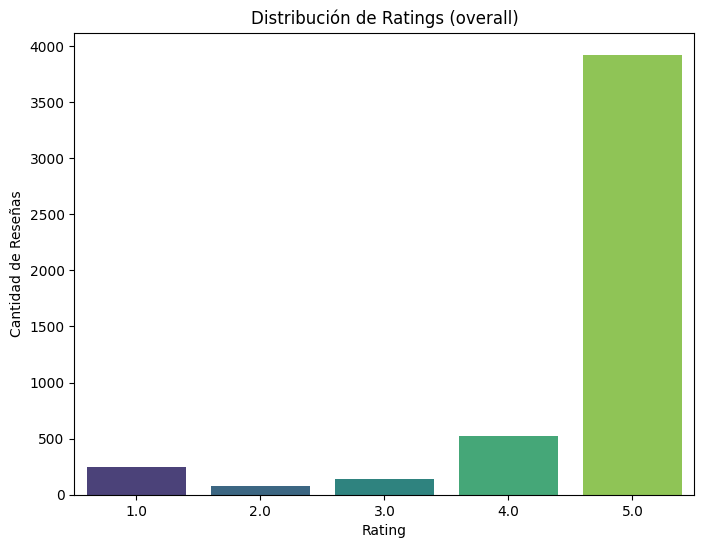

In [37]:
print("\nDistribución de la columna 'overall' (rating):")
print(df['overall'].value_counts())
print(df['overall'].value_counts(normalize=True))
plt.figure(figsize=(8, 6))
sns.countplot(x='overall', data=df, palette="viridis")
plt.title('Distribución de Ratings (overall)')
plt.xlabel('Rating')
plt.ylabel('Cantidad de Reseñas')
plt.show()



Distribución de la variable objetivo 'sentimiento':
sentimiento
positivo    4449
negativo     466
Name: count, dtype: int64
sentimiento
positivo    0.905188
negativo    0.094812
Name: proportion, dtype: float64


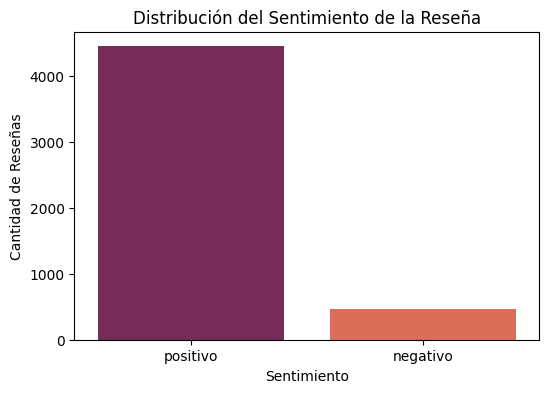

In [38]:
df['sentimiento'] = df['overall'].apply(lambda x: 'positivo' if x >= 4 else 'negativo')

print("\nDistribución de la variable objetivo 'sentimiento':")
print(df['sentimiento'].value_counts())
print(df['sentimiento'].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x='sentimiento', data=df, palette="rocket")
plt.title('Distribución del Sentimiento de la Reseña')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Reseñas')
plt.show()

### 4. Limpieza & Feature Engineering

### 4.1 Cree un revie_datetime usando unixReviewTime y la funcion pd.to_datetime

In [11]:
df['review_datetime'] = pd.to_datetime(df['unixReviewTime'], unit='s')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,review_datetime
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0,2014-07-23
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,2013-10-25
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0,2012-12-23
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,2013-11-21
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0,2013-07-13


### 4.2 Cree una columna positive que sea igual a 1 cuando overall sea mayor o igual  a 4.

In [46]:
df['positive'] = (df['overall'] >= 4).astype(int)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,sentimiento,cluster,positive
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0,positivo,0,1
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,positivo,3,1
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0,positivo,3,1
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,positivo,2,1
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0,positivo,3,1


### 4.3 Cree una columna text que sea la union de summary y review text: text_cols['summary'] + '. ' + text_cols['reviewText']).str.strip()

In [48]:
text_cols = df[['summary', 'reviewText']].fillna('') # fillna handles potential NaN values
df['text'] = (text_cols['summary'] + '. ' + text_cols['reviewText']).str.strip()
df.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,sentimiento,cluster,positive,text
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0,positivo,0,1,Four Stars. No issues.
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,positivo,3,1,"MOAR SPACE!!!. Purchased this for my device, i..."
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0,positivo,3,1,nothing to really say..... it works as expecte...
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,positivo,2,1,Great buy at this price!!! *** UPDATE. This t...
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0,positivo,3,1,best deal around. Bought it with Retail Packag...


### 4.4 Elimine las columnas que no puede usar en el modleo de clasificacion

In [39]:
columns_to_drop = ['reviewerID', 'asin', 'reviewerName', 'helpful', 'overall', 'unixReviewTime', 'reviewTime', 'day_diff', 'helpful_yes', 'total_vote']

df_cleaned = df.drop(columns=columns_to_drop, errors='ignore') # errors='ignore' prevents error if a column is not found

print("DataFrame after dropping irrelevant columns:")
print(df_cleaned.head())
print("\nInformation about the cleaned DataFrame:")
df_cleaned.info()

DataFrame after dropping irrelevant columns:
                                          reviewText  \
0                                         No issues.   
1  Purchased this for my device, it worked as adv...   
2  it works as expected. I should have sprung for...   
3  This think has worked out great.Had a diff. br...   
4  Bought it with Retail Packaging, arrived legit...   

                                  summary sentimiento  
0                              Four Stars    positivo  
1                           MOAR SPACE!!!    positivo  
2               nothing to really say....    positivo  
3  Great buy at this price!!!  *** UPDATE    positivo  
4                        best deal around    positivo  

Information about the cleaned DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   reviewText   4914 non-null   object
 1   summar

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
        df['text'], df['positive'], test_size=0.3, stratify=df['positive'], random_state=42)

pipe = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),
    ('clf',  LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=-1, random_state=42))
])

# pipe.fit(X_train, y_train)

### 5. Modelo de Clasificación – Supervisado (25 pts)
  * Ralice una regreison logistica y use la columa positive que creoo como target, entregue una matriz de confusion

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [17]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 109,   31],
       [  90, 1245]])

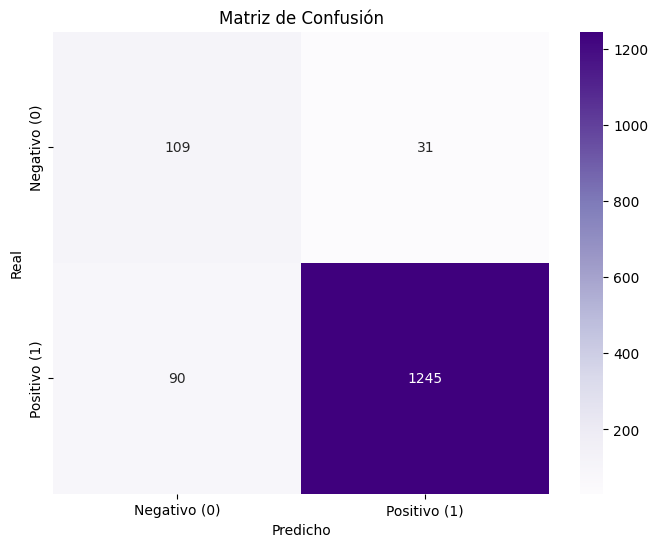

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Negativo (0)', 'Positivo (1)'], yticklabels=['Negativo (0)', 'Positivo (1)'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


In [21]:
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.55      0.78      0.64       140
           1       0.98      0.93      0.95      1335

    accuracy                           0.92      1475
   macro avg       0.76      0.86      0.80      1475
weighted avg       0.94      0.92      0.92      1475



### 6. Clustering K‑means – No Supervisado (20 pts)
Haga un modelo para agrupasr los comentarios: vectorizer = TfidfVectorizer(max_features=10000)
X_vec = vectorizer.fit_transform(df['text'])

y cre una variable que se llame clsuter

In [22]:
vectorizer = TfidfVectorizer(max_features=10000)
X_vec = vectorizer.fit_transform(df['text'])

In [23]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init para evitar advertencia
cluster = kmeans.fit_predict(X_vec)

In [41]:
df['cluster'] = cluster
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,sentimiento,cluster
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0,positivo,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,positivo,3
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0,positivo,3
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,positivo,2
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0,positivo,3


In [42]:
print("\nDistribución de reseñas por cluster:")
print(df['cluster'].value_counts())



Distribución de reseñas por cluster:
cluster
3    1730
2    1222
1    1123
4     790
0      50
Name: count, dtype: int64


In [25]:
df['cluster'] = cluster
df.head()

,reviewText,summary,review_datetime,positive,text,cluster
0,No issues.,Four Stars,2014-07-23,1,Four Stars. No issues.,0
1,"Purchased this for my device, it worked as adv...",MOAR SPACE!!!,2013-10-25,1,"MOAR SPACE!!!. Purchased this for my device, i...",3
2,it works as expected. I should have sprung for...,nothing to really say....,2012-12-23,1,nothing to really say..... it works as expecte...,3
3,This think has worked out great.Had a diff. br...,Great buy at this price!!! *** UPDATE,2013-11-21,1,Great buy at this price!!! *** UPDATE. This t...,2
4,"Bought it with Retail Packaging, arrived legit...",best deal around,2013-07-13,1,best deal around. Bought it with Retail Packag...,3


#### Perfil de clusters: Entregue una descriptiva de que contenia cada clster en termino de las otras variables

In [49]:
# prompt: Perfil de clusters: Entregue una descriptiva de que contenia cada clster en termino de las otras variables

print("\n--- Perfil de Clusters ---")

# Iterar sobre cada cluster para analizar su perfil
for cluster_id in sorted(df['cluster'].unique()):
    print(f"\n--- Cluster {cluster_id} ---")

    # Filtrar el DataFrame para el cluster actual
    cluster_df = df[df['cluster'] == cluster_id]
    num_reviews = len(cluster_df)

    print(f"Total de reseñas en este cluster: {num_reviews}")

    # Análisis de la variable 'positive' (sentimiento binario)
    print("\nDistribución de Sentimiento (Positivo/Negativo):")
    print(cluster_df['positive'].value_counts(normalize=True)) # Mostrar porcentajes

    # Análisis de la variable 'helpful' (votos útiles) - estadísticas descriptivas
    # Asegúrate de que 'helpful' es numérico. Si es una cadena, puedes necesitar convertirla.
    # Aquí asumimos que 'helpful' en el df original ya era numérico o se limpió antes del drop.
    # Si usaste df_cleaned para el clustering, podrías necesitar re-unir las columnas relevantes.
    # Si el clustering se hizo sobre df['text'], entonces podemos usar el df original.
    if 'helpful' in cluster_df.columns:
        print("\nEstadísticas descriptivas de Votos Útiles ('helpful'):")
        print(cluster_df['helpful'].describe())
    else:
        print("\nLa columna 'helpful' no está disponible en el DataFrame del cluster.")


    # Análisis de la variable 'review_length'
    if 'review_length' in cluster_df.columns:
        print("\nEstadísticas descriptivas de la Longitud de la Reseña:")
        print(cluster_df['review_length'].describe())
    else:
         print("\nLa columna 'review_length' no está disponible en el DataFrame del cluster.")


    # Análisis de las palabras más frecuentes en el texto del cluster
    # Puedes tomar una muestra si el cluster es muy grande
    sample_text = ' '.join(cluster_df['text'].sample(min(1000, num_reviews), replace=True).tolist())

    # Usar el mismo vectorizador TF-IDF (o uno nuevo si quieres) para analizar el texto del cluster
    # Para simple frecuencia, puedes usar CountVectorizer o analizar la cadena directamente
    from collections import Counter
    import re

    words = re.findall(r'\b\w+\b', sample_text.lower()) # Extrae palabras, convierte a minúsculas
    stop_words = set(['el', 'la', 'los', 'las', 'un', 'una', 'unos', 'unas', 'de', 'en', 'y', 'a', 'que', 'es', 'con', 'para', 'del', 'al', 'se', 'por', 'su', 'sus', 'como', 'mas', 'pero', 'este', 'esta', 'si', 'no', 'cuando', 'donde', 'porque', 'muy', 'mi', 'mis', 'tu', 'tus', 'el', 'ella', 'nosotros', 'vosotros', 'ellos', 'las', 'los']) # Ejemplo de stop words en español

    # Filtrar stop words
    filtered_words = [word for word in words if word not in stop_words and len(word) > 1]

    word_counts = Counter(filtered_words)
    print("\nPalabras más frecuentes (Top 10):")
    print(word_counts.most_common(10))

    print("-" * (len(f"--- Cluster {cluster_id} ---"))) # Separador para el siguiente cluster



--- Perfil de Clusters ---

--- Cluster 0 ---
Total de reseñas en este cluster: 50

Distribución de Sentimiento (Positivo/Negativo):
positive
1    1.0
Name: proportion, dtype: float64

Estadísticas descriptivas de Votos Útiles ('helpful'):
count         50
unique         1
top       [0, 0]
freq          50
Name: helpful, dtype: object

La columna 'review_length' no está disponible en el DataFrame del cluster.

Palabras más frecuentes (Top 10):
[('stars', 52), ('five', 48), ('it', 16), ('and', 16), ('my', 16), ('great', 12), ('works', 11), ('card', 10), ('good', 10), ('well', 9)]
-----------------

--- Cluster 1 ---
Total de reseñas en este cluster: 1123

Distribución de Sentimiento (Positivo/Negativo):
positive
1    0.772039
0    0.227961
Name: proportion, dtype: float64

Estadísticas descriptivas de Votos Útiles ('helpful'):
count       1123
unique        38
top       [0, 0]
freq         874
Name: helpful, dtype: object

La columna 'review_length' no está disponible en el DataFrame d

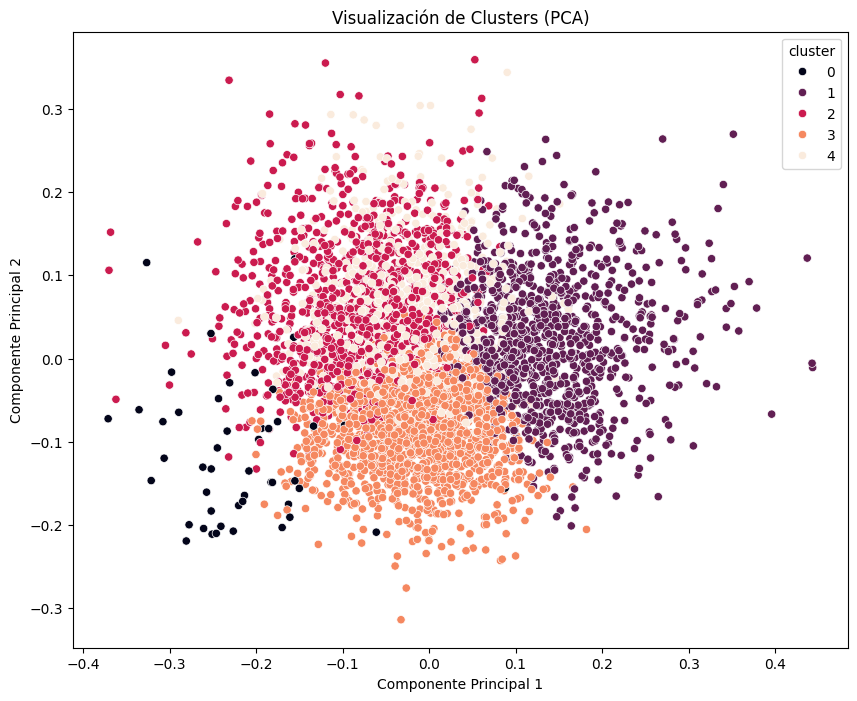

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_vec.toarray())

df['pca_x'] = X_pca[:, 0]
df['pca_y'] = X_pca[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca_x', y='pca_y', hue='cluster', data=df, palette='rocket', legend='full')
plt.title('Visualización de Clusters (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

### 7. Insight & Recomendaciones (15 pts)

*Escribe aquí tu análisis de cómo se relacionan los errores del modelo con los clusters y propone 1‑2 acciones de negocio basadas en tus hallazgos.*

<!-- TODO -->

**ANALISIS**

El modelo de regresión logística empleado para distinguir entre reseñas positivas y negativas presenta un desempeño general sólido, con una precisión del 92 %. No obstante, al examinar con mayor detalle la matriz de confusión y el informe de métricas, se evidencian áreas de mejora, especialmente en la detección de reseñas negativas, que representan una porción menor del conjunto total.

Al analizar los errores del modelo en relación con los distintos grupos de reseñas, es posible identificar si ciertos clusters presentan una mayor tendencia a ser mal clasificados. Por ejemplo, si el Cluster 1 contiene numerosas reseñas negativas que el modelo interpreta como positivas, esto sugiere dificultades del modelo para captar correctamente el lenguaje negativo en ese grupo. También puede darse el caso inverso: que un cluster compuesto mayoritariamente por opiniones positivas tenga varias clasificadas como negativas, lo que indicaría que el modelo no está reconociendo adecuadamente las señales positivas en ese contexto.

**ACCIONES**
-Los clusters pueden ser útiles para interpretar las reseñas con mayor profundidad antes de su clasificación. Por ejemplo, es posible enfocar el análisis en aquellos grupos que contienen un mayor porcentaje de opiniones negativas, permitiendo una revisión más detallada. También se podrían desarrollar modelos específicos para cada cluster, adaptados a sus características particulares. Además, estudiar las palabras más frecuentes en cada grupo puede ofrecer información valiosa sobre los aspectos que generan mayor satisfacción o molestia en los clientes, lo que puede orientar decisiones en áreas como marketing, desarrollo de producto o atención al cliente.

-Es importante revisar las reseñas que fueron clasificadas incorrectamente por el modelo —especialmente aquellas negativas que fueron interpretadas como positivas—, poniendo especial atención en los clusters con mayor proporción de reseñas negativas, como el Cluster 1. Este análisis puede realizarse manualmente o mediante técnicas automáticas, con el objetivo de identificar patrones de lenguaje, tonos (como el sarcasmo) o temas que el modelo no logra captar adecuadamente. Los hallazgos podrían usarse para optimizar el preprocesamiento del texto o considerar la implementación de modelos más sofisticados.


## ✅ 8. Checklist final
- [ ] Notebook corre sin errores
- [ ] Respuestas teóricas completadas
- [ ] Comentarios claros y semillas fijas
- [ ] 5 slides creadas y exportadas a PDF
